Average Accuracy Score of MLP Model: 97.21%
Average Accuracy Score of Random Model: 28.63%


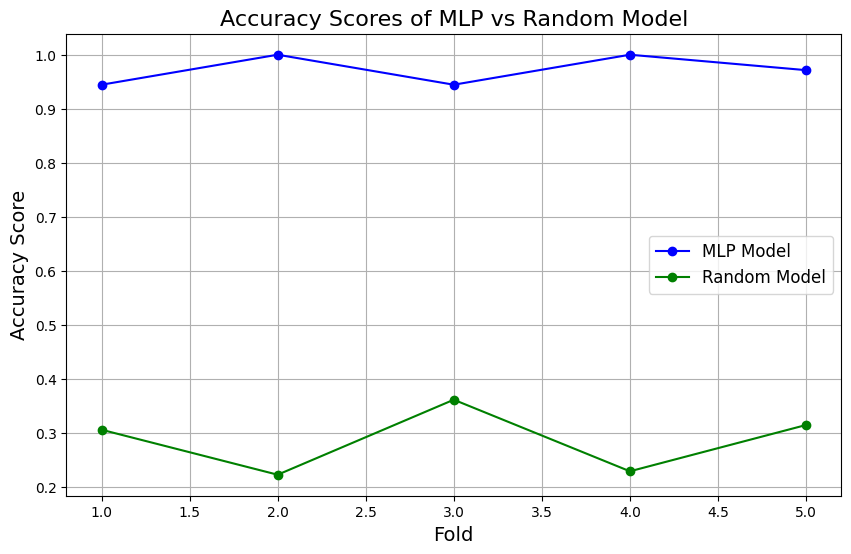

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Reading the dataset
wine = pd.read_csv("wine.data", header=None)

# Assigning column names based on wine dataset information
wine.columns = [
    "Wine",
    "Alcohol",
    "Malic_Acid",
    "Ash",
    "Alcalinity_of_Ash",
    "Magnesium",
    "Total_Phenols",
    "Flavanoids",
    "Nonflavanoid_Phenols",
    "Proanthocyanins",
    "Color_Intensity",
    "Hue",
    "OD280/OD315",
    "Proline",
]

# Separating features (X) and target variable (y)
x = wine.drop("Wine", axis=1)
y = wine["Wine"]

# Normalizing the features using MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Initializing the Multi-Layer Perceptron model
mlp_model = MLPClassifier(max_iter=1000, activation="tanh", solver="lbfgs")

# Performing 5-fold cross-validation for the MLP model
kf = KFold(n_splits=5, random_state=10, shuffle=True)
mlp_scores = []

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mlp_model.fit(x_train, y_train)
    predictions = mlp_model.predict(x_test)
    mlp_scores.append(accuracy_score(y_test, predictions))

mlp_mean_score = np.mean(mlp_scores)
print(f"Average Accuracy Score of MLP Model: {mlp_mean_score * 100:.2f}%")

# Simulating a random model for comparison
random_scores = []
for train_index, test_index in kf.split(x):
    y_test = y[test_index]
    random_predictions = np.random.randint(low=1, high=4, size=len(y_test))  # Random predictions
    random_scores.append(accuracy_score(y_test, random_predictions))

random_mean_score = np.mean(random_scores)
print(f"Average Accuracy Score of Random Model: {random_mean_score * 100:.2f}%")

# Visualizing the accuracy scores for both models
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), mlp_scores, label="MLP Model", marker="o", color="blue")
plt.plot(range(1, 6), random_scores, label="Random Model", marker="o", color="green")
plt.title("Accuracy Scores of MLP vs Random Model", fontsize=16)
plt.xlabel("Fold", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()
